#Week 9: Day 1 – Dimensionality Reduction
# Feature Selection Using Fisher Score and Chi2 (X2) Test
### What is a fishet score and a chi2 (X2) test?
Fisher score is one of the most widely used supervised featuer selection methods. It select each featuers independently according to their scores under the fisher criterion which lead to a suboptimal subset of featuers

### Chi2 (X2) Test
a chi-squared test also written as X2 test, is any statistical hypothesis test where the sampling distribution of the test statistics is a chi-squared distibution.

chi-sqared measures dependence between stochasticvaribales, using this function'weeds out' the features that are the most likely to be independent of class and therefore irrelevent for classification

In [ ]:
# loading the libraries to read and import data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# here we will import functions from the sklearn library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [ ]:
# loading the titanic dataset
titanic=sns.load_dataset("titanic")

In [ ]:
# lets check the first 5 rows of our dataset
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# lets see if there are null values in the dataset
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# lets drop the columns with the null values
titanic.drop(labels= ["age", "deck"], axis=1, inplace=True)

In [ ]:
titanic= titanic.dropna()

In [ ]:
# we check to see if the columns are dropped
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
# now lets convert the categorical data into a string
data=titanic[["pclass", "sex", "sibsp", "parch", "embarked", "who", "alone"]].copy()

In [ ]:
# now let check the first five rows of the dataframe
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [ ]:
# let check if there is any null value in the data
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [ ]:
# now lets convert the categorical into a numerical value
sex={"male":0, "female":1}
data["sex"]=data["sex"].map(sex)

In [ ]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [ ]:
# will do the same to the embark column
ports={"S":0, "C":1, "Q":2}
data["embarked"]=data["embarked"].map(ports)

In [ ]:
# and also the "who" column
who={"man":0, "woman":1, "child":2}
data["who"]=data["who"].map(who)     

In [ ]:
# and to the last column
alone={True:1, False:0}
data["alone"]=data["alone"].map(alone)

In [ ]:
# now let check our data to make sure its all encoded
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


#### Do F-Test
here we will go ahead and do a chi(x2) test

In [ ]:
X=data.copy()
y=titanic["survived"]

In [ ]:
# lets check the shape of data we are dealing with
X.shape, y.shape

((889, 7), (889,))

In [ ]:
# here we split the data
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# now lets go ahead an calculate the f score
f_score=chi2(X_train, y_train)

In [ ]:
# lets print the f score
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [ ]:
# here we will create a series base on the f_score result and call it the p_values
p_values=pd.Series(f_score[1], index=X_train.columns)
p_values.sort_values(ascending=True, inplace=True)

In [ ]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

<AxesSubplot:>

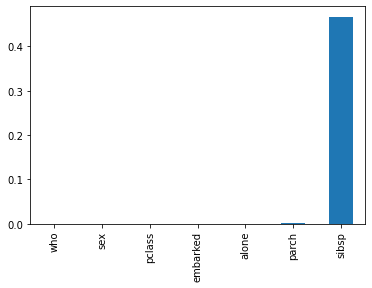

In [ ]:
# plotting a bar chart for the p value
p_values.plot.bar()

In [ ]:
# we will select the 2 features to check its accuracy
X_train_2=X_train[["who", "sex"]]
X_test_2=X_test[["who", "sex"]]                  

In [ ]:
# here we will run the randomforest algorithm, pass the x and y, predict and check the accuracy
def run_randomForest(X_train, X_test, y_train, y_test):
    clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [ ]:
# here we will check the time it takes to run the randomforest function
%%time
run_randomForest(X_train_2, X_test_2, y_train, y_test)

Accuracy:  0.7191011235955056
CPU times: user 278 ms, sys: 81.4 ms, total: 360 ms
Wall time: 382 ms


In [ ]:
# now lets go ahead and cheack for the rest of the features
X_train_3=X_train[["who", "sex", "pclass"]]
X_test_3=X_test[["who", "sex", "pclass"]]  

In [ ]:
%%time
run_randomForest(X_train_3, X_test_3, y_train, y_test)

Accuracy:  0.7415730337078652
CPU times: user 249 ms, sys: 74.3 ms, total: 323 ms
Wall time: 285 ms


In [ ]:
X_train_4=X_train[["who", "sex", "pclass", "embarked"]]
X_test_4=X_test[["who", "sex", "pclass", "embarked"]]  

In [ ]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7584269662921348
CPU times: user 269 ms, sys: 72.2 ms, total: 341 ms
Wall time: 328 ms


In [ ]:
X_train_4=X_train[["who", "sex", "pclass", "alone"]]
X_test_4=X_test[["who", "sex", "pclass", "alone"]]  

In [ ]:
%%time
run_randomForest(X_train_4, X_test_4, y_train, y_test)

Accuracy:  0.7528089887640449
CPU times: user 269 ms, sys: 76.4 ms, total: 345 ms
Wall time: 329 ms


In [ ]:
X_train_5=X_train[["who", "sex", "pclass", "embarked", "alone"]]
X_test_5=X_test[["who", "sex", "pclass", "embarked", "alone"]]  

In [ ]:
%%time
run_randomForest(X_train_5, X_test_5, y_train, y_test)

Accuracy:  0.7528089887640449
CPU times: user 256 ms, sys: 70.8 ms, total: 327 ms
Wall time: 335 ms


In [ ]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.7359550561797753
CPU times: user 266 ms, sys: 76.6 ms, total: 342 ms
Wall time: 294 ms


# Feature Dimension Reduction using LDA and PCA with Python| Principal Component Analysis in Feature Selection
### What is LDA
Linear Discriminant Analysis is a supervised algorithm as it takes the class label into consideration. it is a way to reduce "dimmensionality" while at the same time preserving as much of the class discrimination information as possible'

### What is a PCA
 Pricipal Componenet Analysis(PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimmensional space by projecting it into a lower-dimmensional sub-space. it tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation

In [ ]:
# importing libraries to load and read the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# importing pakages in other to work with our dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [ ]:
# loading our dataset
data=pd.read_csv("C:\\Users\\Zachary_B\\Desktop\\dataset\\santander-train.csv", nrows=20000)
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# we are going to using the last column (target) to read into the x, y then check the shape
X=data.drop("TARGET", axis=1)
y=data["TARGET"]


X.shape,y.shape

((20000, 370), (20000,))

In [ ]:
# we will go ahead and do the train, test and split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#### Remove Constant, Quasi Constant and Duplicate Features

In [ ]:
# remove constant and quasi constant features
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(X_train)
X_train_filter=constant_filter.transform(X_train)
X_test_filter=constant_filter.transform(X_test)

In [ ]:
# after removing it lets go ahead and check what we are left with
X_train_filter.shape, X_test_filter.shape

((16000, 245), (4000, 245))

In [ ]:
# remove duplicate features
X_train_T=X_train_filter.T
X_test_T=X_test_filter.T

In [ ]:
X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

In [ ]:
# sum up all duplicate
X_train_T.duplicated().sum()

18

In [ ]:
duplicated_features=X_train_T.duplicated()

In [ ]:
# now let go ahed and find the featuers we want to keep
features_to_keep=[not index for index in duplicated_features]

X_train_unique=X_train_T[features_to_keep].T
X_test_unique=X_test_T[features_to_keep].T

In [ ]:
# we will do the standardization here 
scaler=StandardScaler().fit(X_train_unique)
X_train_unique=scaler.transform(X_train_unique)
X_test_unique=scaler.transform(X_test_unique)

In [ ]:
# checkingthe unique values
X_train_unique=pd.DataFrame(X_train_unique)
X_test_unique=pd.DataFrame(X_test_unique)

In [ ]:
# finally checking the shape to see hat we are left with
X_train_unique.shape, X_test_unique.shape

((16000, 227), (4000, 227))

#### Removal of correlated Feature

In [ ]:
# first we are going to get all the corrolation matric among all the featuers
corrmat=X_train_unique.corr()

In [ ]:
# lets check the shape of the corr features
corrmat.shape

(227, 227)

In [ ]:
# find correlated features and print it
def get_correlation(data, threshold):
    corr_col=set()
    corrmat=data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j])>threshold:
                colname=corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

corr_features=get_correlation(X_train_unique, 0.70)
print("correlated features: ", len(set(corr_features)) )

correlated features:  148


In [ ]:
# we will take the train and test variables in this cell
X_train_uncorr=X_train_unique.drop(labels=corr_features, axis=1)
X_test_uncorr=X_test_unique.drop(labels=corr_features, axis=1)

In [ ]:
# lets run this to know the shape
X_train_uncorr.shape, X_test_uncorr.shape

((16000, 79), (4000, 79))

#### Feature Dimension Reduction by LDA OR Is it as a Classifier

In [ ]:
# import the LDA from the sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
# lets go ahead and impliment the LDA
lda=LDA(n_components=1)
X_train_lda=lda.fit_transform(X_train_uncorr, y_train)

In [ ]:
# cheaking the LDA x train to see if it is transform
X_train_lda.shape

(16000, 1)

In [ ]:
# transforming the test dataset
X_test_lda=lda.transform(X_test_uncorr)

In [ ]:
# shape of the test dataset
#X_test_lda.shape

In [ ]:
# running the randomforest of the train and test dataset, fit in the dataset, predict and print the dataset
def run_randomForest(X_train, X_test, y_train, y_test):
    clf=RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_pred, y_test))

In [ ]:
y_test.shape

(4000,)

In [ ]:
# checking the time it takes to run the randomforest
%time
run_randomForest(X_train_lda, X_test_lda, y_train, y_test)

Wall time: 0 ns
Accuracy on test set: 
0.93025


In [ ]:
%time
run_randomForest(X_train, X_test, y_train, y_test)

Wall time: 0 ns
Accuracy on test set: 
0.9585


#### Feature Reduction by PCA

In [ ]:
# lets import the PCA from sklearn
from sklearn.decomposition import PCA

In [ ]:
# selecting the n components and random state of pca and fiting it in
pca=PCA(n_components=2, random_state=42)
pca.fit(X_test_uncorr)

PCA(n_components=2, random_state=42)

In [ ]:
# getting the training and testing datset
X_train_pca=pca.transform(X_train_uncorr)
X_test_pca=pca.transform(X_test_uncorr)
X_train_pca.shape, X_train_uncorr.shape

((16000, 2), (16000, 79))

In [ ]:
# cheacking the time it took to run the randomforest
%time
run_randomForest(X_train_pca, X_test_pca, y_train, y_test)

Wall time: 0 ns
Accuracy on test set: 
0.9565


In [ ]:
# using the for loop to check the accuracy of all the component
for component in range(1, 79):
    pca=PCA(n_components=component, random_state=42)
    pca.fit(X_test_uncorr)
    X_train_pca=pca.transform(X_train_uncorr)
    X_test_pca=pca.transform(X_test_uncorr)
    print("Selected Comp: ", component)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Comp:  1
Accuracy on test set: 
0.931

Selected Comp:  2
Accuracy on test set: 
0.9565

Selected Comp:  3
Accuracy on test set: 
0.95725

Selected Comp:  4
Accuracy on test set: 
0.956

Selected Comp:  5
Accuracy on test set: 
0.955

Selected Comp:  6
Accuracy on test set: 
0.95575

Selected Comp:  7
Accuracy on test set: 
0.9565

Selected Comp:  8
Accuracy on test set: 
0.956

Selected Comp:  9
Accuracy on test set: 
0.957

Selected Comp:  10
Accuracy on test set: 
0.956

Selected Comp:  11
Accuracy on test set: 
0.956

Selected Comp:  12
Accuracy on test set: 
0.9555

Selected Comp:  13
Accuracy on test set: 
0.95625

Selected Comp:  14
Accuracy on test set: 
0.956

Selected Comp:  15
Accuracy on test set: 
0.95525

Selected Comp:  16
Accuracy on test set: 
0.95575

Selected Comp:  17
Accuracy on test set: 
0.9555

Selected Comp:  18
Accuracy on test set: 
0.95475

Selected Comp:  19
Accuracy on test set: 
0.9565

Selected Comp:  20
Accuracy on test set: 
0.95625

Selected C

# Required Reading: Dimensionality Reduction

## Dimensionality Reduction with PCA and LDA Using Sklearn

Dimensionality reduction refers to reducing the number of features in a dataset in
such a way that the overall performance of the algorithms trained on the dataset is
minimally affected. With dimensionality reduction, the training time of statistical
algorithms can be significantly reduced, and data can be visualized more easily
since it is not easy to visualize datasets in higher dimensions.
There are two main approaches used for dimensionality reduction: Principal
Component Analysis (PCA) and Linear Discriminant Analysis (LDA). In this
chapter, you will study both of them.
### Principal Component Analysis
Principal component analysis is an unsupervised dimensionality reduction
technique that doesn’t depend on the labels of a dataset. Principal component
analysis prioritizes features on the basis of their ability to cause maximum variance
in the output. The idea behind PCA is to capture those features that contain
maximum features about the dataset. The feature that causes the maximum variance
in the output is called the first principal component, the feature that causes the
second-highest variance is called the second principal component, and so on.
### Why Use PCA?
The following are the advantages of PCA:
1. Correlated features can be detected and removed using PCA
2. Reduces overfitting because of reduction in the number of features
3. Model training can be expedited.
### Disadvantages of PCA
There are two major disadvantages of PCA:
1. You need to standardize the data before you apply PCA
2. The independent variable becomes less integrable
3. Some amount of information is lost when you reduce features.
### Implementing PCA with Python’s Sklearn Library
In this section, you will see how to use PCA to select two of the most important
features in the Iris dataset using the Sklearn library. The following script imports
the required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# imports the Iris dataset using the Seaborn library and prints the first five rows of the dataset.
# importing the dataset
iris_df = sns.load_dataset("iris")

#print dataset header
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# The following code divides the data into the features and labels sets.

#creating feature set
X = iris_df.drop(['species'], axis=1)


#creating label set
y = iris_df["species"]

#converting labels to numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [9]:
#dividing data into 80-20% traning and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [10]:
#applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

To apply PCA via Sklearn, all you have to do is import the PCA class from the
Sklearn.decomposition module. Next, to apply PCA to the training set, pass the
training set to the fit_tansform() method of the PCA class object. To apply PCA on
the test set, pass the test set to the transform() method of the PCA class object. This
is shown in the following script.


In [11]:
#importing PCA class
from sklearn.decomposition import PCA

#creating object of the PCA class
pca = PCA()

#training PCA model on training data
X_train = pca.fit_transform(X_train)

#making predictions on test data
X_test = pca.transform(X_test)


Once you have applied PCA on a dataset, you can use the
explained_variance_ratio_ feature to print variance caused by all the features in the
dataset. This is shown in the following

In [12]:
#printing variance ratios
variance_ratios = pca.explained_variance_ratio_
print (variance_ratios)

[0.72229951 0.2397406  0.03335483 0.00460506]


The output above shows that 72.22 percent of the variance in the dataset is caused
by the first principal component, while 23.97 percent of the variance is caused by
the second principal component.
Let’s now select the two principal components that caused a collective variance of
96.19 percent (72.22% + 23.97% = 96.19%).


To select two principal components, all you have to do is pass 2 as a value to the
n_components attribute of the PCA class. The following script selects two principal
components from the Iris training and test sets.


In [13]:
#use one principal component
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Let’s train a classification model using logistic regression, which predicts the label
of the iris plant using the two principal components or features, instead of the
original four features.


In [14]:
#making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

#training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train)


# Predicting the Test set results
y_pred = lg.predict(X_test)

#evaluating results

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_pred))

0.8666666666666667


The output shows that even with two features, the accuracy for correctly predicting
the label for the iris plant is 86.66.
Finally, with two features, you can easily visualize the dataset using the following


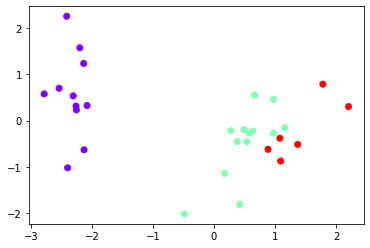

In [16]:
from matplotlib import pyplot as plt 
%matplotlib inline

#print actual datapoints

plt.scatter(X_test[:,0], X_test[:,1], c= y_test, cmap='rainbow')

## Linear Discriminant Analysis
Linear Discriminant Analysis (LDA) is a supervised dimensionality reduction
technique, where a decision boundary is formed around data points belonging to
each cluster of a class. The data points are projected to new dimensions in a way
that the distance between the data points within a cluster is minimized, while the
distance between the clusters is maximized. The new dimensions are ranked w.r.t.
their ability to (i) minimize the distance between data points within a cluster, and
(ii) maximize the distance between individual clusters.
### Why Use LDA?
The following are the advantages of LDA:
1. Reduces overfitting because of reduction in the number of features
2. Model training can be expedited.
### Disadvantages of LDA
There are three major disadvantages of LDA:
    1. Not able to detect correlated features
    2. Cannot be used with unsupervised or unlabeled data
    3. Some amount of information is lost when you reduce features.
### Implementing LDA with Sklearn Library
Let’s see how you can implement LDA using the Sklearn library.

In [17]:
#As always, the first step is to import the required libraries.
import pandas as pd
import numpy as np
import seaborn as sns

You will be using the “banknote.csv” dataset from the Datasets folder in the
GitHub repository. The following script imports the dataset and displays its first
five rows.

In [19]:
#importing dataset
banknote_df = pd.read_csv(r"C:\Users\Zachary_B\Desktop\Dataset\banknote.csv")

#displaying dataset header
banknote_df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [22]:
# dividing data into features and labels
X = banknote_df.drop(["Class"], axis = 1)
y = banknote_df.filter(["Class"], axis = 1)

In [23]:
#dividing data into 80-20% training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [24]:
#applying scaling on training and test data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

To apply LDA via Sklearn, all you have to do is import the
LinearDiscriminantAnalysis class from the Sklearn.decomposition module. Next, to
apply LDA to the training set, pass the training set to the fit_tansform() method of
the LDA class object. To apply LDA on the test set, pass the the LDA class object. To apply LDA on the test set, pass the test set to the
transform() method of the LDA class object. This is shown in the following script.

In [28]:
#importing LDA class
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


#creating object of the LDA class
lda = LDA()

#training PCA model on training data

#.values will give the values in a numpy array (shape: (n,1))
#.ravel will convert that array shape to (n, ) (i.e. flatten it)
X_train = lda.fit_transform(X_train, y_train.values.ravel())

#making predictions on test data
X_test = lda.transform(X_test)

In [29]:
#printing variance ratios
variance_ratios = lda.explained_variance_ratio_
print (variance_ratios)

[1.]


The above output shows that even with one component, the maximum variance can
be achieved.
Next, we select only a single component from our dataset using LDA. To do so,
you have to pass 1 as the attribute value for the n_components attribute of the LDA
class, as shown below

In [31]:
#creating object of the LDA class
lda = LDA(n_components = 1)

#training PCA model on training data
X_train = lda.fit_transform(X_train, y_train.values.ravel())

#making predictions on test data
X_test = lda.transform(X_test)

Next, we will try to class whether or not a banknote is fake using a single feature.
We will use the LogisticRegression algorithm for that. This is shown in the
following script.

In [33]:
#making predictions using logistic regression
from sklearn.linear_model import LogisticRegression

#training the logistic regression model
lg = LogisticRegression()
lg.fit(X_train, y_train.values.ravel())

# Predicting the Test set results
y_pred = lg.predict(X_test)

#evaluating results

from sklearn.metrics import accuracy_score

print (accuracy_score(y_test, y_pred))

0.9890909090909091


The output shows that even with a single feature, we are able to correctly predict
whether or not a banknote is fake with 98.90 percent accuracy.